# 분류문제: 
- LMS에서의 학습태도를 이용한 학생 성적등급 예측
- y값: Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)


    


### [문제1] 아래의 사이트를 참조하여 각 필드 설명

- 데이터셋: https://www.kaggle.com/aljarah/xAPI-Edu-Data
- [문제1-1] 아래의 변수 간략히 설명
     - gender: 학생의 성별(남/녀)
    - NationaliTy:  학생의 국적(쿠웨이트, 레바논,이집트,사우디아라비아,미국,요르단, 베네수엘라, 이란, 튀니지, 모로코, 시리야, 팔레스타인, 이라크, 리비아)
    - PlaceofBirth: 학생의 출생 국가(쿠웨이트, 레바논,이집트,사우디아라비아,미국,요르단, 베네수엘라, 이란, 튀니지, 모로코, 시리야, 팔레스타인, 이라크, 리비아)
    - StageID: 학생의 교육 수준(그 미만/중학교/고등학교)
    - GradeID: 학생의 학년(기준: ‘G-01', ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘ 총 12학년)
    - SectionID: 학생의 반(A/B/C)
    - Topic: 수강과목(영어,스페인어,프랑스어,아랍어,IT,수학,화학,생물학,과학,역사,쿠란,지리학)
    - Semester: 학기(1학기/2학기)
    - Relation: 학생의 보호자(어머니/아버지)
    - raisedhands: 학생이 수업 중 손을 든 횟수 (0~100회)
    - Discussion: 학생이 조별 토론에 참여한 횟수(0~100회)
    - VisITedResources: 학생이 강의 자료를 방문한 횟수 (0~100회)
    - Discussion: 학생이 조별 토론에 참여한 횟수(0~100회)
    - ParentAnsweringSurvey: 부모의 학교에서 배부된 설문지 응답 여부(예/아니오) 
    - ParentschoolSatisfaction: 부모의 학교에 대한 만족도(예/아니오)
    - StudentAbscenceDays: 각 학생의 결석한 날의 수 (7일 초과/7일 이하)
    - Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)      
    



    
- [문제1-2] xAPI-Edu-Data 데이터의 전반적 설명

2가지 이상의 독립변수오 이루어져있다.

총 인스턴스 수: 480

Area: E-learning, Education, Predictive models, Educational Data Mining

필드값은 object 아니면 integer이다

Number of Attributes: 16

Date: 2016-11-8

분류과제와 관련이 있음 

결측값 없음

파일형태: xAPI-Edu-Data.csv

이 데이터는 Kalboard 360이라 불린는 LMS으로부터 수집된 교육 데이터 셋이다
Kalboard 멀티 에이전트 LMS로, 인터넷이 접속된 어떤 기기에서든 교육자료와 동기 접속을 사용자에게 제공한다.
이 데이터는 학습자 활동 추적 도구인 xAPI를 사용하여 수집되었다.

이 데이터셋은 학생 480명의 데이터와 16가지 필드로 구성되어있다.
필드들은 3가지의 주요 카테고리로 분류된다.
(1) 인구학적 핃드들(성별과 국적)
(2) 교육배경(교육수준, 학년,반)
(3) 행동 특징들(수업시간 손을 든(거수) 횟수, 자료 열람, 부모의 설문지조사 응답, 학교 만족도)

## [문제2] 데이터셋 준비 및 기초통계분석


### [문제2-1] 판다스에서  read_csv 로 한글 읽을때 발생하는 encoding에 대하여 정리


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()
#df.info()
#df.describe()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


Missing value : 없음
feature값이 총 17개로
int형 자료 4개, string 형 자료가 13개이다


### [문제2-2] df 자료의 무작위 번호 10개 출력(480개의 행중 무작위로 10개 데이터 출력)
- 방법1) 판다스의 샘플 데이터 출력 이용
- 방법2) 직접 rand함수를 이용하여 샘플 번호 출력

In [197]:
### 문제2-2의 방법1
df.sample(n=10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
198,M,Morocco,Morocco,MiddleSchool,G-08,B,Arabic,S,Father,27,15,42,53,No,Bad,Above-7,L
101,F,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Mum,70,92,50,7,Yes,Good,Under-7,H
318,F,Jordan,Jordan,lowerlevel,G-02,A,French,F,Mum,60,97,13,3,Yes,Good,Under-7,H
90,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,4,8,10,60,Yes,Good,Above-7,L
188,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,S,Mum,75,71,72,53,Yes,Good,Under-7,H
229,M,KW,KuwaIT,MiddleSchool,G-08,A,Spanish,S,Father,5,17,21,10,No,Bad,Above-7,L
41,M,KW,KuwaIT,MiddleSchool,G-07,A,IT,F,Father,19,20,16,50,No,Good,Under-7,M
345,F,Jordan,Jordan,lowerlevel,G-02,B,French,F,Mum,13,82,20,30,No,Good,Under-7,H
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
325,M,Syria,Syria,lowerlevel,G-02,A,French,S,Father,27,20,33,35,No,Bad,Under-7,M


In [198]:
### 문제2-2의 방법2


### [문제2-3] df.info 의 type의 이해

- [문제2-3-1] df의 타입중  object형만 출력
    - 구글검색해서 해보세요..
    - 출력결과는 gender, nationallTy, PlaceofBirth, StageId 등 object형의  컬럼명만 출력되면 됨
- [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사


In [199]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [200]:
##  [문제2-3-1] df의 타입중  object형만 출력
df.select_dtypes(include='object').columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey',
       'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'],
      dtype='object')

In [202]:
## [문제2-3-3] 판다스의 type중  object와 category 의 차이점에 대하여 조사
#일반적인 문자열을 갖는 칼럼은 object로 사용하고, 값이 종류가 제한적일 때 category를 사용.

#ex) 아침식사 여부에 대한 칼럼
#값을 0=먹지않음, 1=먹음 으로 두 종류 -> category
#아침식사 종류에 대한 칼럼: 샐러드, 소고기, 바나나 하나 등 다양한 값 ->object

In [203]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


### [문제2-4] object형의 데이터 카운트 및 비율 확인
- 카운트와 %를 출력 (gender' / 'NationallTy' 등 object 형만 작업) 
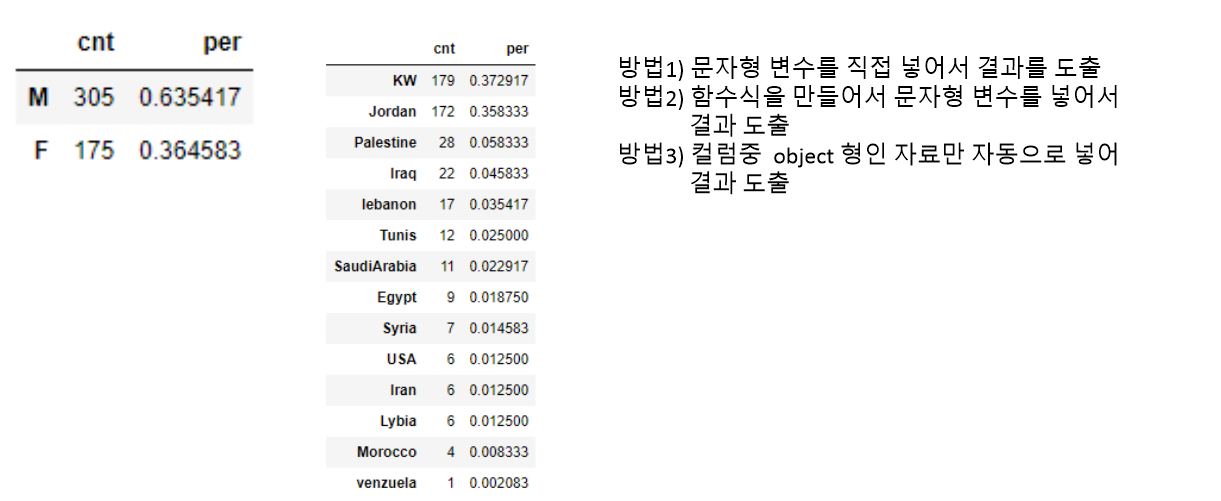

In [44]:
M = df['gender'][df['gender']=='M'].count()
F = df['gender'][df['gender']=='F'].count()
total = df['gender'].count()
df_2 = pd.DataFrame([[ M,M/total],[F,F/total]],
                 index= df['gender'].unique(),
                 columns=['cnt','per'])

df_2



,cnt,per
M,305,0.635417
F,175,0.364583


## [문제3] 수치형 자료 히스토그램 그리기
- # seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

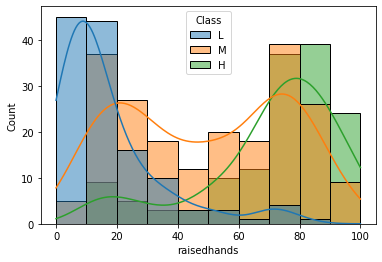

In [204]:

# 아래의 출력결과물을 제작하고 출력결과를 해석
hue_order = ['L','M','H']
sns.histplot(data = df, x = "raisedhands", hue="Class", hue_order = hue_order, kde= True)
# 거수(raisedhands)는 수업 참여도와 관련이 있다
# 성적과 거수의 횟수는 유의미한 상관을 보인다.
# 성적이 높을수록 거수 횟수가 많고, 낮을수록 적었다.

<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

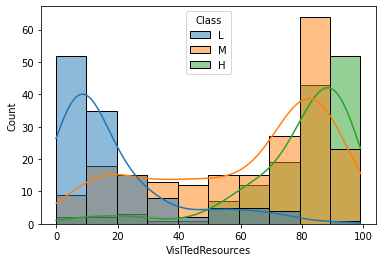

In [205]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(data = df, x = "VisITedResources", hue="Class", hue_order = hue_order, kde= True)
#강의자료 열람은 수업에 대한 흥미도를 보여준다.
#아니면 적어도 성적에 신경은 쓴다는 뜻이다.
## 성적과 자료열람은 유의미한 상관을 보인다.
# 성적이 높을수록 자료열람 횟수가 많고, 낮을수록 적었다.

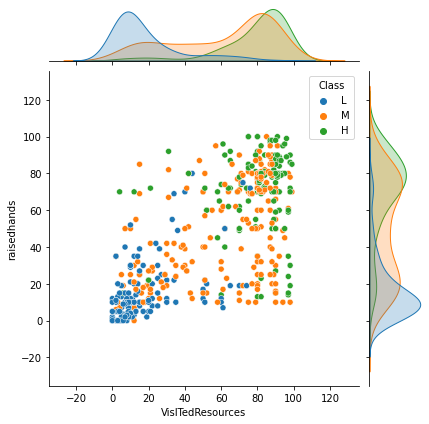

In [128]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

sns.jointplot(data = df, x ="VisITedResources", y ="raisedhands", hue ="Class",  hue_order = hue_order)
# 교육자료 열람횟수와 거수 횟수간 관계를 보여준다
# 교육자료열람 횟수가 많은 사람은 거수횟수도 많은 것으로 보여진다
##성적이 중간인 그룹은 (적은 자료열람& 적은 거수),(많은 자료열람& 많은 거수), 모두에 분포해있었다
# 성적이 높은 그룹은 대체로 (많은 자료열람& 많은 거수)에 분포해 있고,
# 성적이 낮은 그룹은 대체로 (적은 자료열람& 적은 거수)에 분포해 있다

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

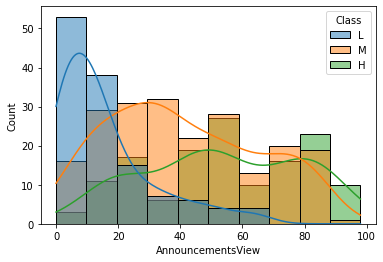

In [206]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.histplot(data = df, x = "AnnouncementsView", hue="Class", hue_order = hue_order, kde= True)
#공지사항 확인의 경우
#중간, 높은 성적의 학생 그룹은 전반적으로 고른 분포를 보인 반면
##성적이 낮은 학생 그룹은 공지사항 확인 횟수가 현저히 낮은 경향을 보인다.

<AxesSubplot:xlabel='Discussion', ylabel='Count'>

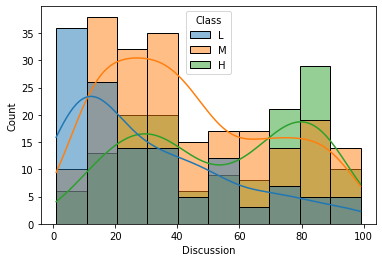

In [133]:
# 아래의 출력결과물을 제작하고 출력결과를 해석

sns.histplot(data = df,x ="Discussion", hue="Class", hue_order = hue_order, kde= True)
#성적이 낮은 학생의 그룹은 조별토론에서 가장 낮은 참여율을 보인다.
#성적이 중간인 학생 그룹은 대체로 20-40회 정도의 참여율을 보였고
##성적이 높은 학생 그룹의 경우 전반적으로 고르지만 80-100회에선 차지 비율이 가장 높다.

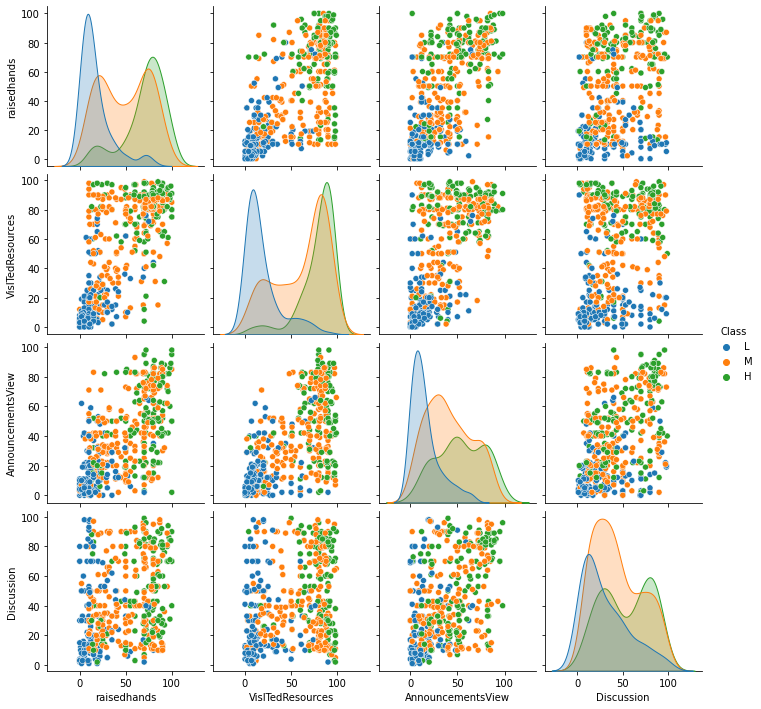

In [207]:
# 아래의 출력결과물을 제작하고 출력결과를 해석
sns.pairplot(data = df,hue="Class", hue_order = hue_order)

### 문제4) Y값의  Class 컬럼을 수치로 바꾸어 표현하기

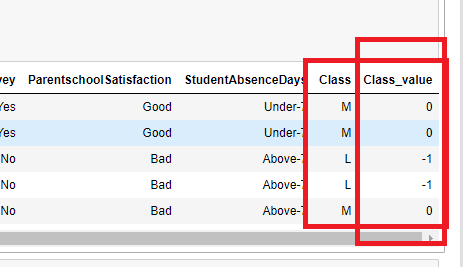

In [31]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
# 파이썬 Map함수를 이용하여 작업
dict = {
        'L': -1,
        'M': 0,
        'H' :1
}


df['Class_value'] = df['Class'].map(dict)

df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L,-1
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M,0
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M,0
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L,-1


<BarContainer object of 2 artists>

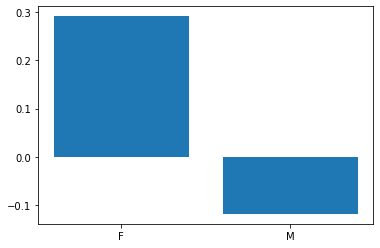

In [214]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index,gb)


<BarContainer object of 12 artists>

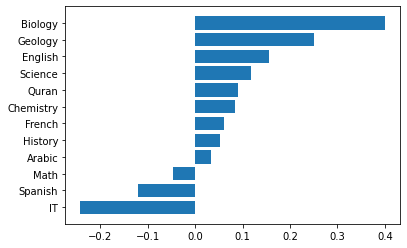

In [215]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석

gb = df.groupby('Topic').mean()['Class_value'].sort_values(ascending = True)
plt.barh(gb.index,gb)

<BarContainer object of 2 artists>

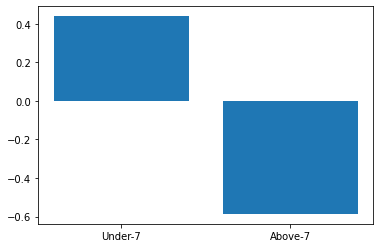

In [217]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# 차트 해석
gb = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values(ascending = False)
plt.bar(gb.index,gb)

## 문제5. 모델 학습을 위한 데이터 전처리


### [문제5-1]  get_dummies()를 이용하여 범주형 데이터 전처리하기


In [209]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [47]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# ['ParentschoolSatisfaction', 'Class', 'Class_value'] 는 drop하여서 변수에서 제외


df=pd.read_csv('xAPI-Edu-Data.csv')
df_dummy= pd.get_dummies(df)
df_dummy

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7,Class_H,Class_L,Class_M
0,15,16,2,20,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,20,20,3,25,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,10,7,0,30,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
476,50,77,14,28,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
477,55,74,25,29,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,0,1
478,30,17,14,57,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0


### [문제5-2]  학습데이터와 테스트데이터 분리하기
- X_train, X_test, y_train, y_test 데이터셋 제작
- 테스트사이즈 0.3으로 분리/  같은 데이터셋을 추출할수 있도록  random번호 지정


In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#왜 안되는지 모르겠어요
y= df['Class_value']
X=df_dummy[df_dummy.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

KeyError: 'Class_value'

## [문제6]. Classification 모델 학습하기


### [문제6-1]. Logistic Regression 모델 생성/학습하기
- max_iter 옵션값 조정을 통해 학습성능 높이기

In [ ]:
model = LogisticRegression(max_iter=9)  
model.fit(X_train, y_train)

## [문제7]. 모델 학습 결과 평가하기
- Predict를 수행하고 classification_report() 결과 출력하기
- 혼돈행렬 시각화 하기

In [ ]:
y_preds=model.predict(X_)
print(accuracy_score(y, y_preds))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pres))

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y, y_preds)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=model.classes_)
disp.plot()

### 참고. Logistic Regression 모델 계수로 상관성 파악하기

In [66]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

In [65]:
model_lr.coef_.shape

(3, 59)

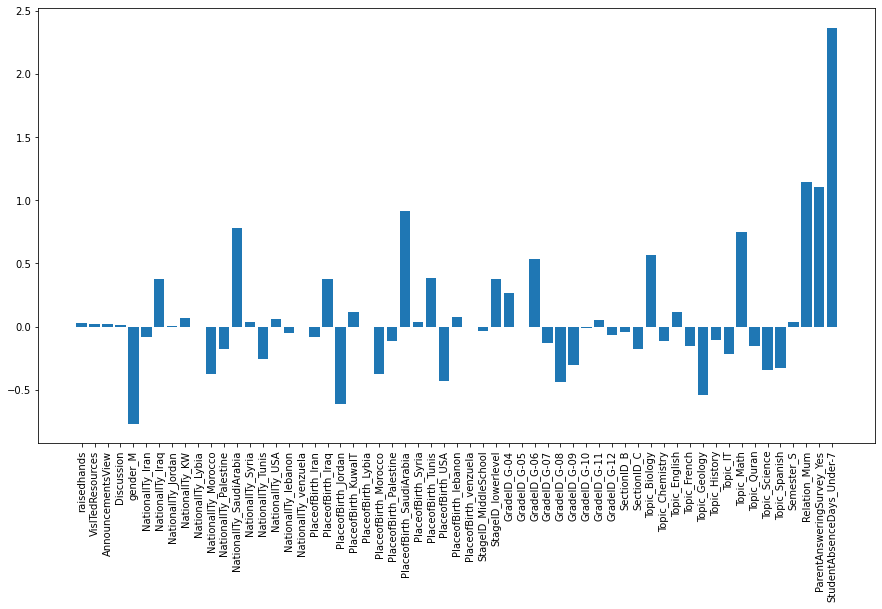

In [70]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[0, :])
plt.xticks(rotation=90)
plt.show()

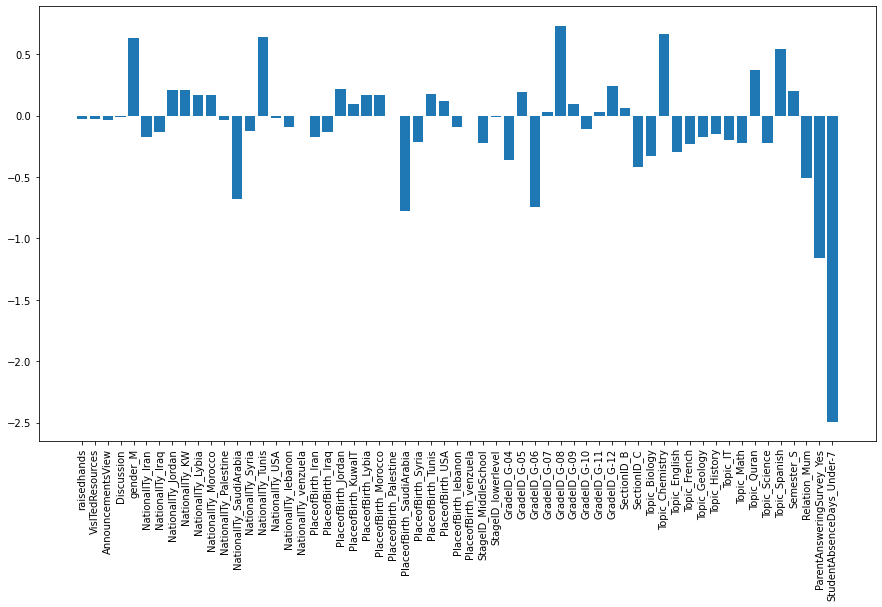

In [72]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
fig = plt.figure(figsize=(15, 8))
plt.bar(X.columns, model_lr.coef_[1, :])
plt.xticks(rotation=90)
plt.show()

## [문제]. 의사결정트리 또는 랜덤 포레스트 모델로 학습하기